In [153]:
import pandas as pd

file_path = "HeadsUpData.csv"
data = pd.read_csv(file_path)
data.dropna(inplace=True)



In [154]:
print(data)
print(data['Session number'])
print(data['Ending total josh'].sum())
print(data['Ending total jimmy'].sum())
print(data['Hands'].sum())
print(data['Session number'].max())


      Date  Session number Stakes  Hands  Josh bi  Jimmy bi  \
0   8/4/24             1.0    1,2  100.0      1.0       1.0   
1   8/4/24             2.0   .5,1  254.0      1.0       3.0   
2   8/5/24             3.0   .5,1   74.0      1.0       1.0   
3  8/31/24             4.0   .5,1  130.0      1.0       2.0   
4   9/5/24             5.0   .5,1  114.0      3.0       1.0   

   Ending total josh  Ending total jimmy  
0             -200.0               200.0  
1              300.0              -300.0  
2              100.0              -100.0  
3              175.0              -175.0  
4             -100.0               100.0  
0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
Name: Session number, dtype: float64
275.0
-275.0
672.0
5.0


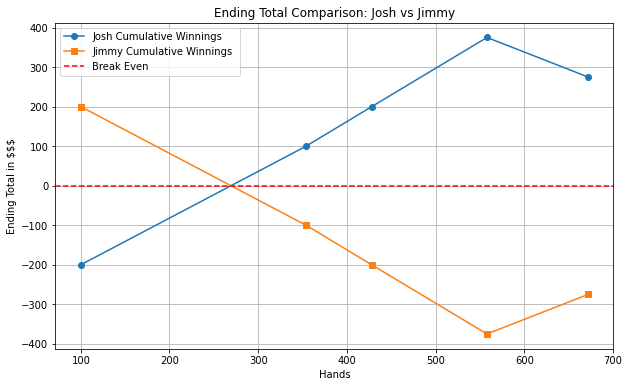

In [155]:
import matplotlib.pyplot as plt
data = pd.read_csv(file_path)
data.dropna(inplace=True)
# change data'hands' to cumsum
data['Cumulative Hands'] = data['Hands'].cumsum()

data['Josh Cumulative Winnings'] = data['Ending total josh'].cumsum()
data['Jimmy Cumulative Winnings'] = data['Ending total jimmy'].cumsum()

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(data['Cumulative Hands'], data['Josh Cumulative Winnings'], label='Josh Cumulative Winnings', marker='o')
plt.plot(data['Cumulative Hands'], data['Jimmy Cumulative Winnings'], label='Jimmy Cumulative Winnings ', marker='s')

plt.axhline(y=0, color='r', linestyle='--', label='Break Even')

# Adding labels and title
plt.xlabel('Hands')
plt.ylabel('Ending Total in $$$')
plt.title('Ending Total Comparison: Josh vs Jimmy')

# Adding a legend
plt.legend()

# Displaying the plot
plt.grid(True)
plt.show()

In [156]:
# at this rate when will we finish the challenge by, currently we have x hands done and we are doing x hands per y days project out to finish of 3,000 hands

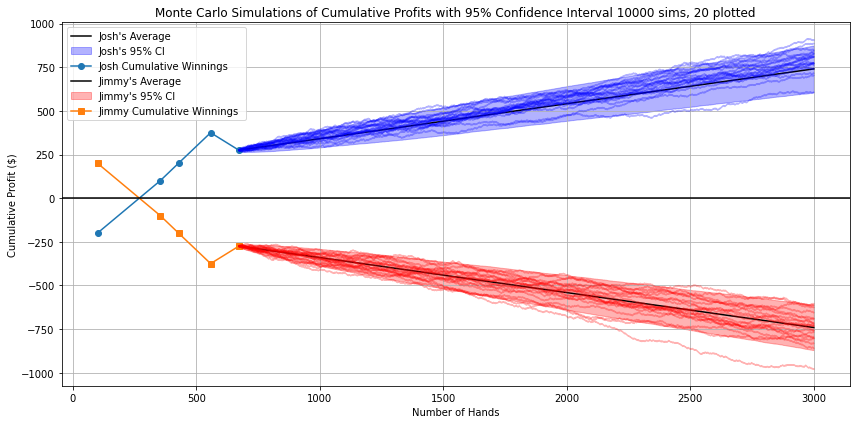

In [237]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

challenge_end = 3000

# Calculate profit per hand for each player
data['Cumulative Hands'] = data['Hands'].cumsum()
data['Josh_profit_per_hand'] = data['Ending total josh'] / data['Hands']
data['Jimmy_profit_per_hand'] = data['Ending total jimmy'] / data['Hands']
data['Josh Cumulative Winnings'] = data['Ending total josh'].cumsum()
data['Jimmy Cumulative Winnings'] = data['Ending total jimmy'].cumsum()
def bootstrap_simulation(player_data, n_hands=int(challenge_end - data['Hands'].sum()), n_simulations=10000):
    cumulative_results = []
    for _ in range(n_simulations):
        sample = np.random.choice(player_data, size=n_hands, replace=True)
        cumulative_sample = np.cumsum(sample)
        cumulative_results.append(cumulative_sample)
    return np.array(cumulative_results)

# Run simulations for both players
josh_cumulative = bootstrap_simulation(data['Josh_profit_per_hand'])
jimmy_cumulative = bootstrap_simulation(data['Jimmy_profit_per_hand'])

# Calculate statistics for each hand (cumulative)
def calculate_cumulative_stats(cumulative_results):
    mean = np.mean(cumulative_results, axis=0)
    ci_lower = np.percentile(cumulative_results, 2.5, axis=0)
    ci_upper = np.percentile(cumulative_results, 97.5, axis=0)
    return mean, ci_lower, ci_upper

# Get mean and confidence intervals for both players
josh_mean, josh_ci_lower, josh_ci_upper = calculate_cumulative_stats(josh_cumulative)
cumWinningsJo = data['Josh Cumulative Winnings'].iloc[-1]
josh_mean = josh_mean + cumWinningsJo
josh_ci_lower = josh_ci_lower + cumWinningsJo
josh_ci_upper = josh_ci_upper + cumWinningsJo
josh_cumulative = josh_cumulative + cumWinningsJo

jimmy_mean, jimmy_ci_lower, jimmy_ci_upper = calculate_cumulative_stats(jimmy_cumulative)
cumWinningsJi = -1*cumWinningsJo
jimmy_mean = jimmy_mean + cumWinningsJi
jimmy_ci_lower = jimmy_ci_lower + cumWinningsJi
jimmy_ci_upper = jimmy_ci_upper + cumWinningsJi
jimmy_cumulative = jimmy_cumulative + cumWinningsJi
total_hands = int(data['Cumulative Hands'].iloc[-1] )

# create shift for simulation versus origional data
start_x = np.linspace(1, total_hands,total_hands)
hands_left = challenge_end-total_hands
shifted_x = np.linspace(total_hands+1,challenge_end,hands_left)

# Create a graph showing Monte Carlo simulations with confidence intervals
plt.figure(figsize=(12, 6))
# Plot Josh's mean and confidence interval
plt.plot(shifted_x,josh_mean, color='black', label="Josh's Average")
plt.fill_between(shifted_x, josh_ci_lower, josh_ci_upper, color='blue', alpha=0.3, label="Josh's 95% CI")
plt.plot(data['Cumulative Hands'], data['Josh Cumulative Winnings'], label='Josh Cumulative Winnings', marker='o')


# Plot Jimmy's mean and confidence interval
plt.plot(shifted_x,jimmy_mean, color='black', label="Jimmy's Average")
plt.fill_between(shifted_x, jimmy_ci_lower, jimmy_ci_upper, color='red', alpha=0.3, label="Jimmy's 95% CI")
plt.plot(data['Cumulative Hands'], data['Jimmy Cumulative Winnings'], label='Jimmy Cumulative Winnings ', marker='s')\


# Plot Josh's simulations
for sim in josh_cumulative[:20]:
    plt.plot(shifted_x,sim, color='blue', alpha=0.3)
josh_avg = np.mean(josh_cumulative, axis=0)

# Plot Jimmy's simulations
for sim in jimmy_cumulative[:20]:
    plt.plot(shifted_x,sim, color='red', alpha=0.3)
jimmy_avg = np.mean(jimmy_cumulative, axis=0)


plt.title('Monte Carlo Simulations of Cumulative Profits with 95% Confidence Interval 10000 sims, 20 plotted')
plt.xlabel('Number of Hands')
plt.ylabel('Cumulative Profit ($)')
plt.legend(loc='upper left')
plt.grid(True)

# Add horizontal line at y=0
plt.axhline(y=0, color='black', linestyle='-')

plt.tight_layout()
plt.show()
